# Simulación de eventos discretos, Teoría de colas
## Integrantes:
- **José Miguel Zayas Pérez** (tlgrm: @nex25k) _____ C312
- **Adrián Hernández Santos** (tlgrm: @ahdez929) _____ C311

In [13]:
from simulation import simulate_call_center

### Ejemplo
Se realiza una simulación para 5 empleados y se visualizan los resultados obtenidos.

In [14]:
from analysis import *

PARAMETERS = {
    'time': 180, 
    'operators': 5,
    'duration_mean': 6,
    'arrival_mean': 3
}
PARAMETERS_ANALIZE = {
    'time': 180, 
    'operators': PARAMETERS['operators'],
    'operator_costxhour': 24,
    'profitxcall': 210,
    'porcentage_lost_calls': 0.6,
}

sim_result = simulate_call_center(PARAMETERS)

analize = Analizer(sim_result, PARAMETERS_ANALIZE)

print(analize)



        Calls: 62
        Successful calls: 61
        Lost calls: 1
        Average call duration: 5.501711028187659
        Max call duration: 20.3339306193461
        Min call duration: 0.03859133410758066
        Total time: 156.5892230344926
        Lost money: 126.0
        Employees: 5
        Employees cost: 960
        


Se realizan 2000 simulaciones para cada cantidad de empleados y se va guardando la información de cada una.

In [15]:

simulation_count = 2000

data_w_employees = []
for employees_cant in range(3,10):
    data = []
    for i in range(simulation_count):
        PARAMETERS['operators'] = employees_cant
        PARAMETERS_ANALIZE['operators'] = employees_cant
        simu_result = simulate_call_center(PARAMETERS)
        analize = Analizer(simu_result, PARAMETERS_ANALIZE)
        data.append(analize)
    data_w_employees.append((employees_cant, data))

Se procesan los datos obtenidos anteriormente y se calculan diferentes valores estadísitcos, posteriormente se grafican y se muestran los resultados obtenidos.

El precio de un empleado en 8h es 192

Analisis para 3 empleados

        Llamadas Perdidas
        Media: 12.1565
        Mediana: 12.0
        Varianza: 28.728007749999996
        Desviacion: 5.3598514671583946
        Minimo: 0
        Maximo: 36
        


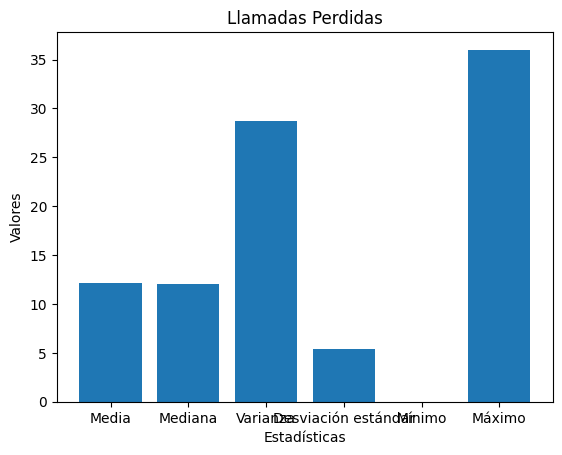

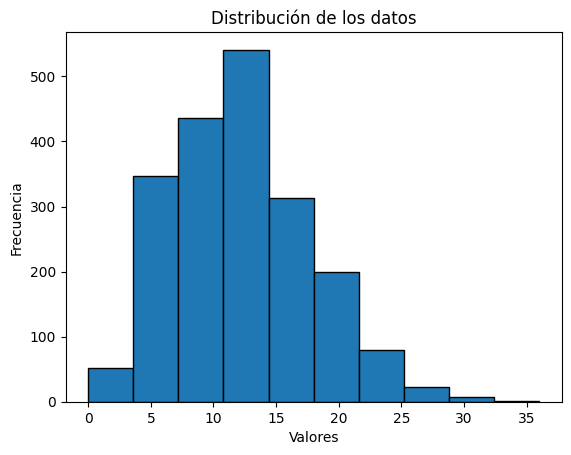


        Dinero Perdido
        Media: 1531.719
        Mediana: 1512.0
        Varianza: 456085.85103900003
        Desviacion: 675.3412848619578
        Minimo: 0.0
        Maximo: 4536.0
        


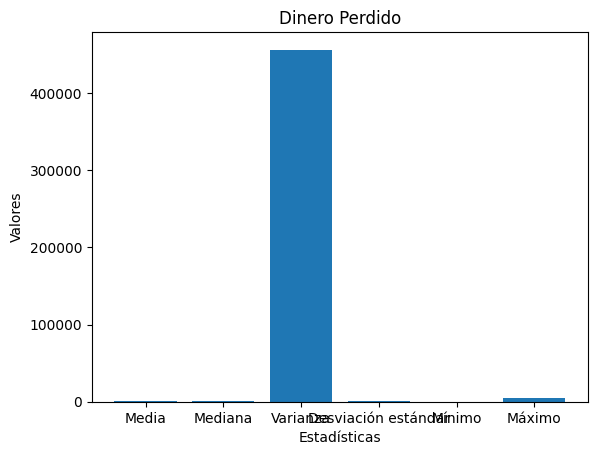

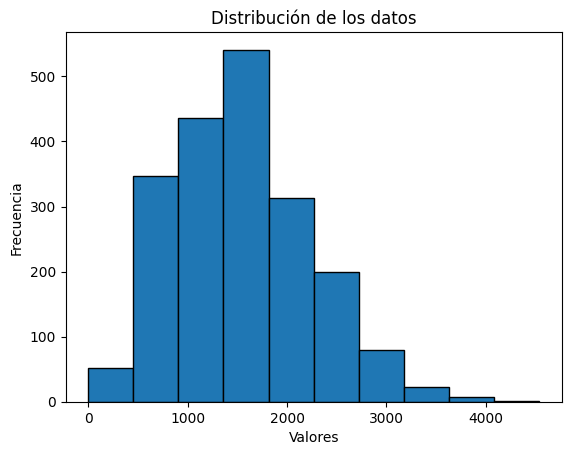

Analisis para 4 empleados

        Llamadas Perdidas
        Media: 5.5565
        Mediana: 5.0
        Varianza: 12.335807750000004
        Desviacion: 3.512236858470682
        Minimo: 0
        Maximo: 25
        


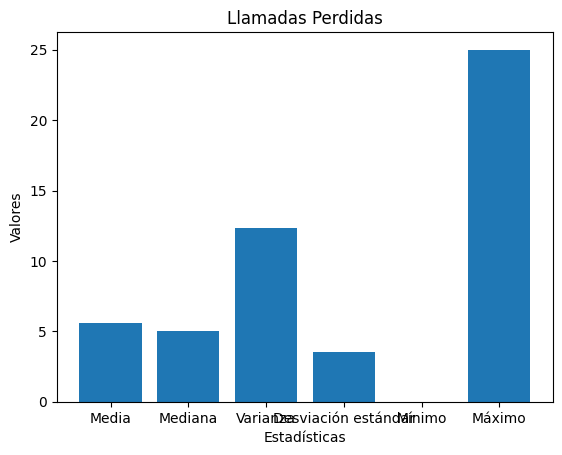

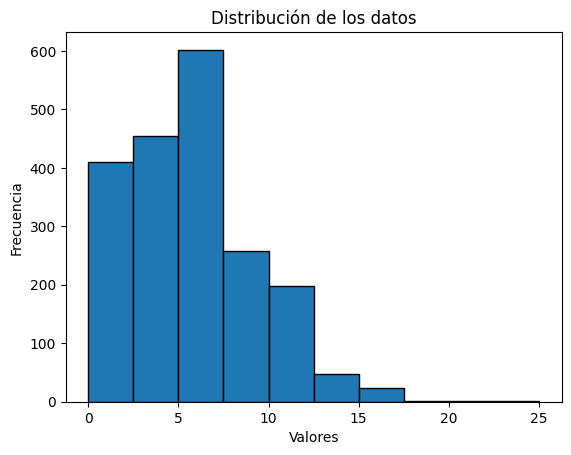


        Dinero Perdido
        Media: 700.119
        Mediana: 630.0
        Varianza: 195843.28383899998
        Desviacion: 442.54184416730584
        Minimo: 0.0
        Maximo: 3150.0
        


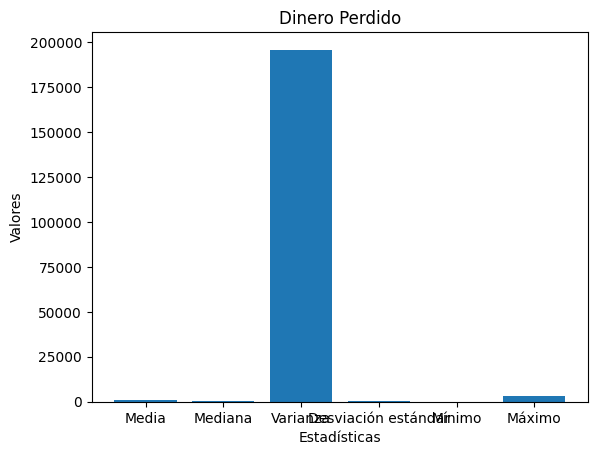

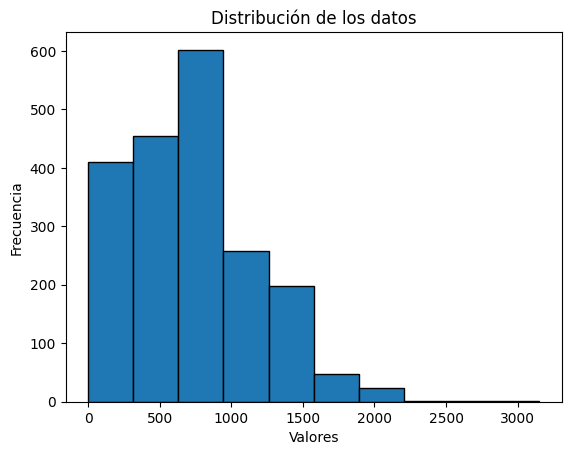

Analisis para 5 empleados

        Llamadas Perdidas
        Media: 2.1345
        Mediana: 2.0
        Varianza: 4.803409750000001
        Desviacion: 2.191668257287129
        Minimo: 0
        Maximo: 13
        


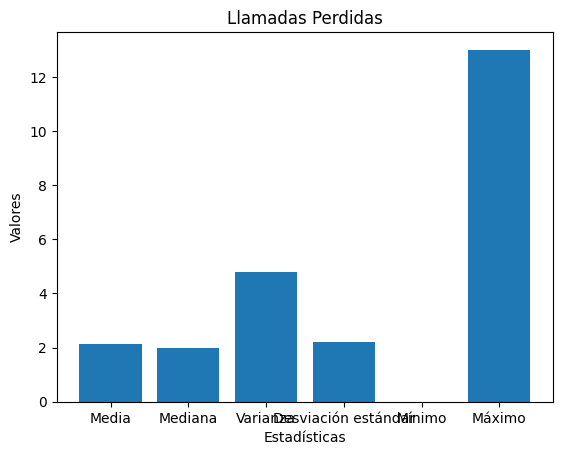

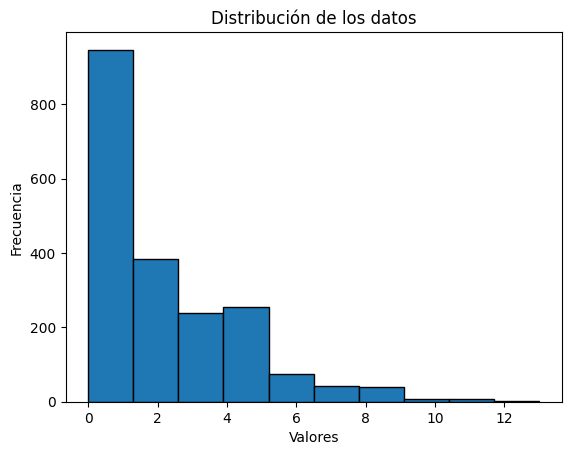


        Dinero Perdido
        Media: 268.947
        Mediana: 252.0
        Varianza: 76258.933191
        Desviacion: 276.15020041817826
        Minimo: 0.0
        Maximo: 1638.0
        


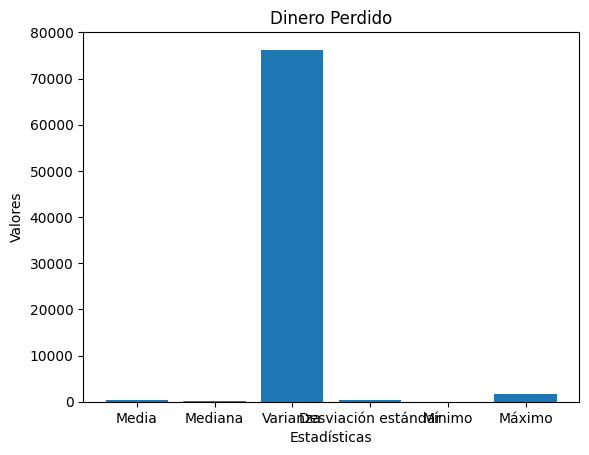

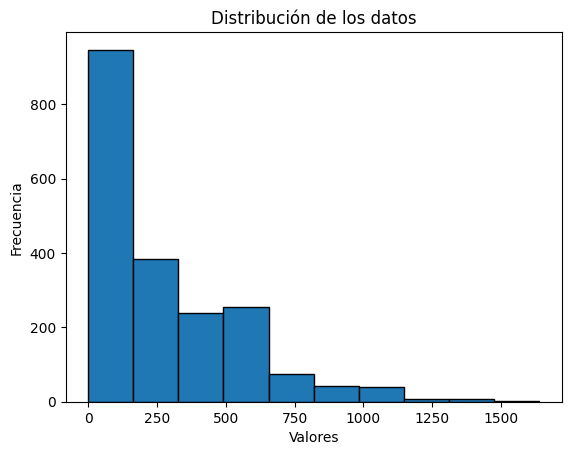

Analisis para 6 empleados

        Llamadas Perdidas
        Media: 0.638
        Mediana: 0.0
        Varianza: 1.2269560000000002
        Desviacion: 1.107680459338342
        Minimo: 0
        Maximo: 8
        


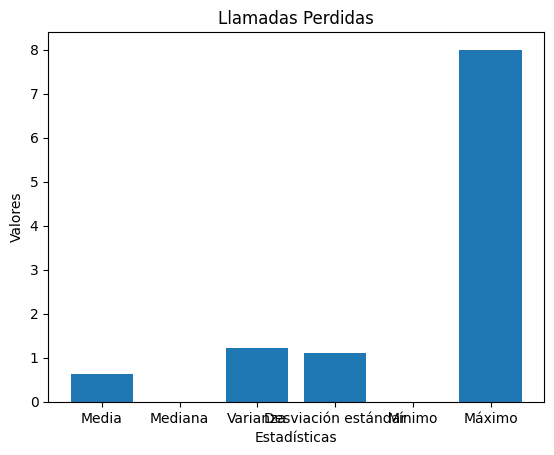

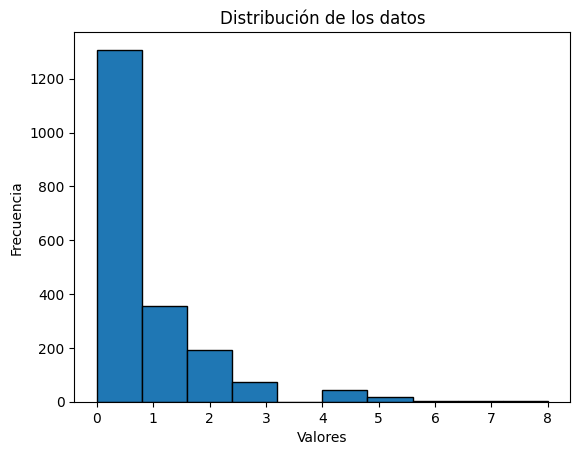


        Dinero Perdido
        Media: 80.388
        Mediana: 0.0
        Varianza: 19479.153455999993
        Desviacion: 139.56773787663104
        Minimo: 0.0
        Maximo: 1008.0
        


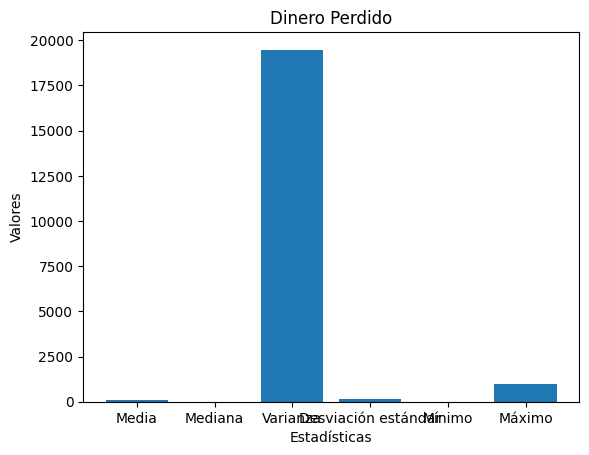

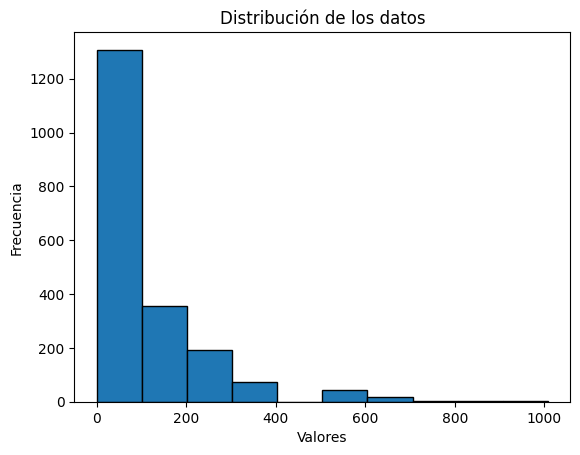

Analisis para 7 empleados

        Llamadas Perdidas
        Media: 0.173
        Mediana: 0.0
        Varianza: 0.28907099999999997
        Desviacion: 0.5376532339714883
        Minimo: 0
        Maximo: 4
        


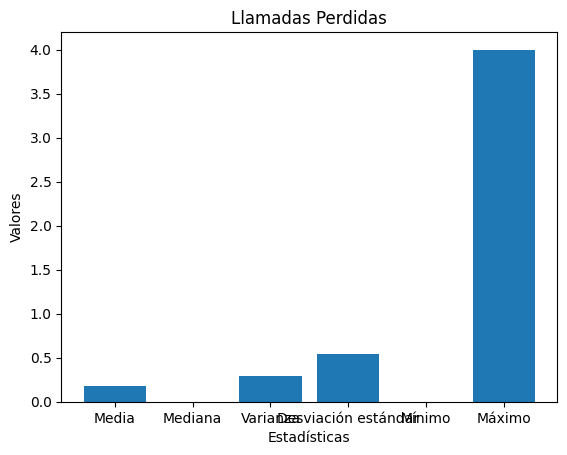

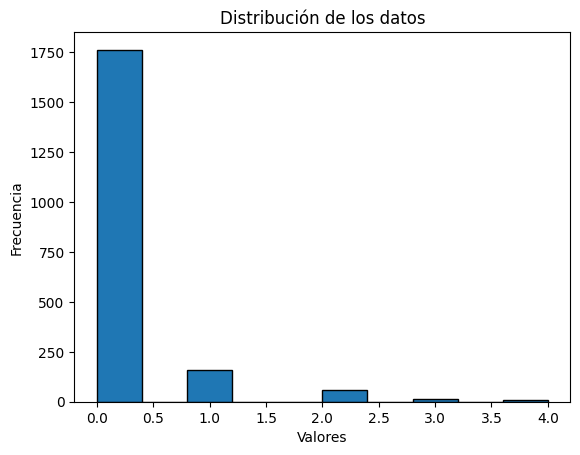


        Dinero Perdido
        Media: 21.798
        Mediana: 0.0
        Varianza: 4589.291196
        Desviacion: 67.74430748040753
        Minimo: 0.0
        Maximo: 504.0
        


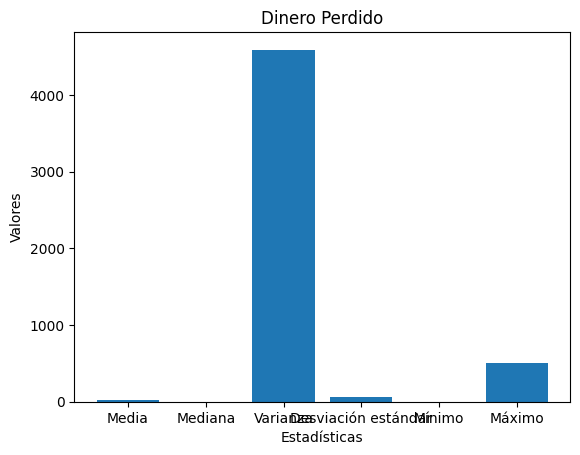

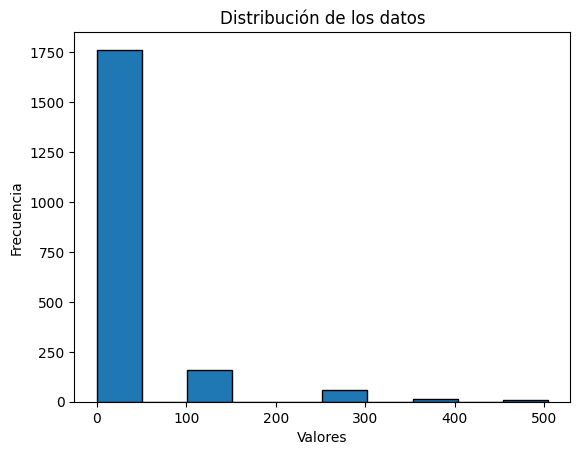

Analisis para 8 empleados

        Llamadas Perdidas
        Media: 0.035
        Mediana: 0.0
        Varianza: 0.044774999999999995
        Desviacion: 0.21160103969498825
        Minimo: 0
        Maximo: 2
        


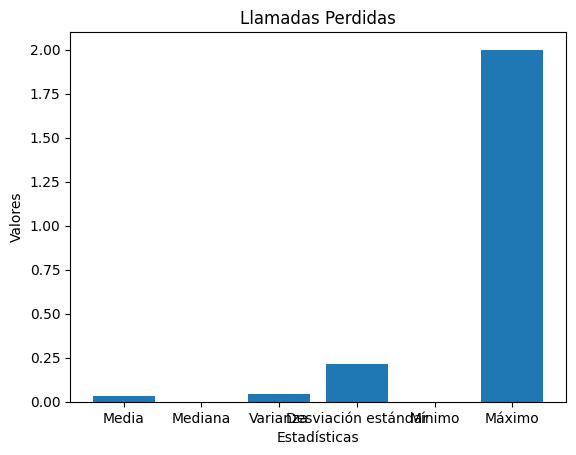

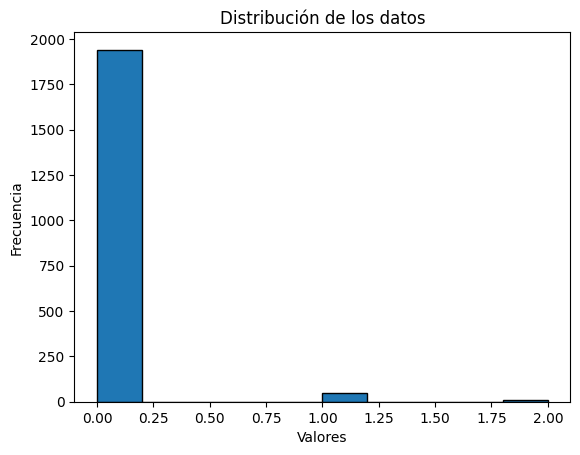


        Dinero Perdido
        Media: 4.41
        Mediana: 0.0
        Varianza: 710.8479000000001
        Desviacion: 26.661731001568523
        Minimo: 0.0
        Maximo: 252.0
        


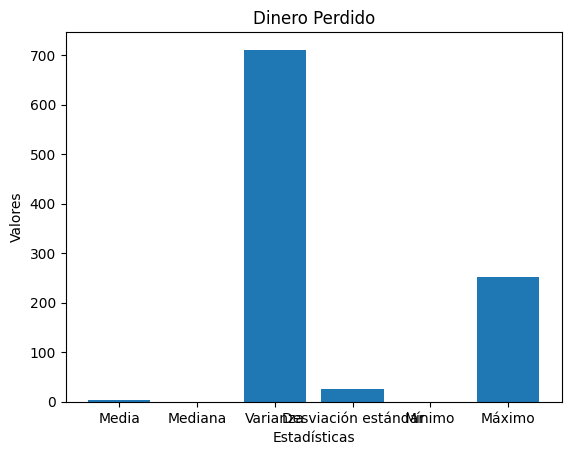

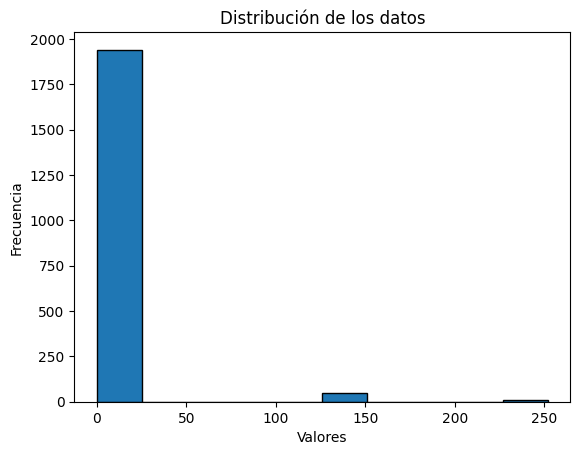

Analisis para 9 empleados

        Llamadas Perdidas
        Media: 0.01
        Mediana: 0.0
        Varianza: 0.018900000000000004
        Desviacion: 0.13747727084867523
        Minimo: 0
        Maximo: 3
        


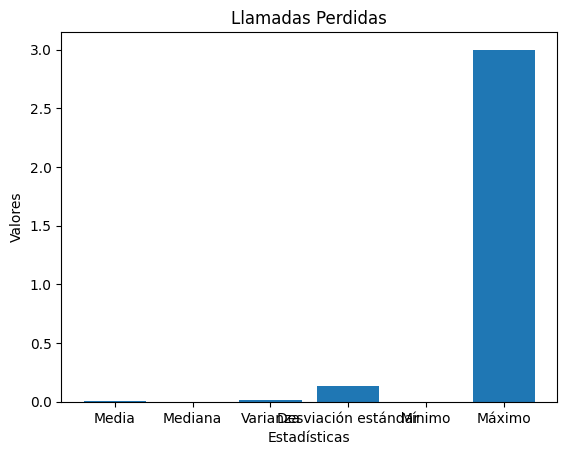

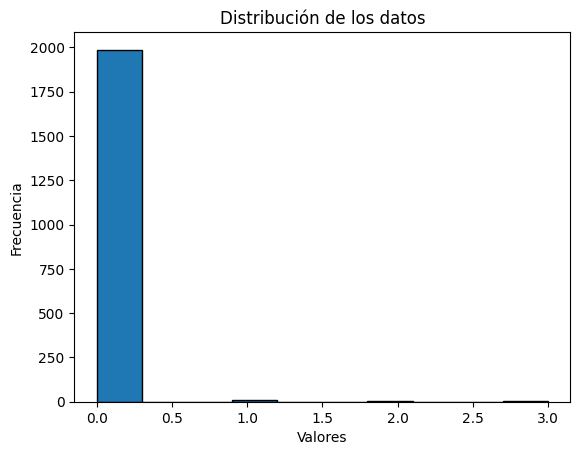


        Dinero Perdido
        Media: 1.26
        Mediana: 0.0
        Varianza: 300.05639999999994
        Desviacion: 17.322136126933074
        Minimo: 0.0
        Maximo: 378.0
        


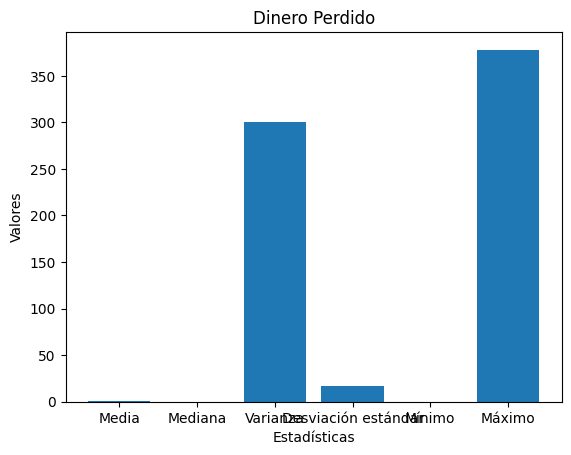

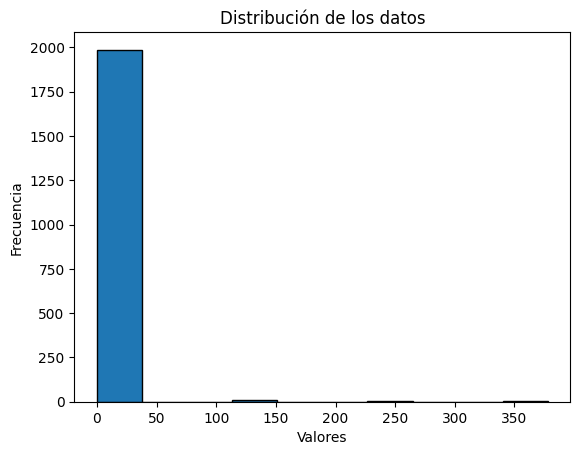

In [16]:
from utils import s_data, analysis

print("El precio de un empleado en 8h es {0}".format(8*24))
print()
for employees, data in data_w_employees:
    print(f"Analisis para {employees} empleados")
    calls, successful_calls, lost_calls, average_call_duration, max_call_duration, min_call_duration, lost_money, total_time = s_data(data)
    analysis(lost_calls,"Llamadas Perdidas",True)
    analysis(lost_money,"Dinero Perdido",True)
    


In [17]:
# formula de Erlang (M/M/C/C)
import math



def erlang(lambd, mu, c, n):
    p0 = 0
    for i in range(c+1):
        p0 += (lambd/mu)**i / math.factorial(i)
    pn = ((lambd/mu)**n / math.factorial(n)) / p0
    return pn

lambd = 1/3
mu = 1/6
r = lambd / mu

def erlang_pc(r,c):
    num= (r**c / math.factorial(c)) 
    den = ([r**i / math.factorial(i) for i in range(c+1)])
    return num / sum(den)

def erlang_L(r, Pc):
    return r *(1 - Pc)

def erlang_W(Pc, L, lambd):
    return L / (lambd * (1 - Pc))

for i in range(3,10):
    print(f"Para {i} empleados")
    pc = erlang_pc(2,i)
    l = erlang_L(2, pc)
    w = erlang_W(pc, l, lambd)
    print(f"Probabilidad del sistema lleno: {pc}")
    print(f"Número medio de clientes en el sistema: {l}")
    print(f"Tiempo medio de estancia en el sistema: {w}")


Para 3 empleados
Probabilidad del sistema lleno: 0.21052631578947367
Número medio de clientes en el sistema: 1.5789473684210527
Tiempo medio de estancia en el sistema: 6.0
Para 4 empleados
Probabilidad del sistema lleno: 0.09523809523809523
Número medio de clientes en el sistema: 1.8095238095238095
Tiempo medio de estancia en el sistema: 6.0
Para 5 empleados
Probabilidad del sistema lleno: 0.03669724770642202
Número medio de clientes en el sistema: 1.926605504587156
Tiempo medio de estancia en el sistema: 6.000000000000001
Para 6 empleados
Probabilidad del sistema lleno: 0.012084592145015107
Número medio de clientes en el sistema: 1.9758308157099698
Tiempo medio de estancia en el sistema: 6.0
Para 7 empleados
Probabilidad del sistema lleno: 0.003440860215053764
Número medio de clientes en el sistema: 1.9931182795698925
Tiempo medio de estancia en el sistema: 6.0
Para 8 empleados
Probabilidad del sistema lleno: 0.0008594757198109154
Número medio de clientes en el sistema: 1.998281048560